# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

First, Let's import the libraries we'll be using in the assignment. 

In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats


Now, let's do some exploratory work.

In [8]:
print df.describe()

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [42]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


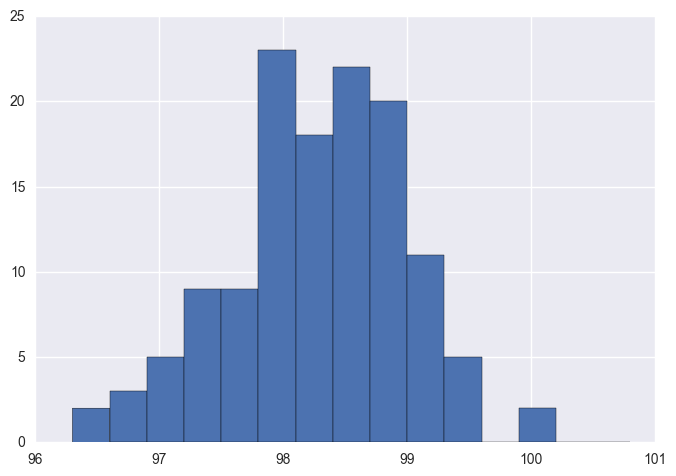

In [40]:
binwidth=0.3
plt.hist(df.temperature, bins=np.arange(min(df.temperature), max(df.temperature) + binwidth, binwidth))
None

It looks like a decent normal distribution. A general rule of thumb for the large enough sample condition is that n≥30, we have n=130 >> 30. So the sample size is good. Since each person is measured independently for their temperatures. We could confidently consider the samples are independent of each other.

Now we'll do some statistical test and see if the population mean is really 98.6 degree. First let's have our null assumption :
 
Null hypothesis : population mean = 98.6. 
 
Alternative hypothesis: population mean  > 98.6 or < 98.6
 
Since in the data, there is no implication that the records are paired or correlated, we will use one sample test. A T-test is appropriate when you are handling small samples (n < 30) and don't know the population standard derivation. while a Z-test is appropriate for large samples (n > 30) and also when you aleady know the population standard derivation. But since we don't know the population standard derivation, we will use T-test (actually when sample size is large, T-test and Z-test are actually very close.)


### T-test

In [31]:
#T-test

mu=97   #Our null hypothesis mu=97
n=130

#Calculate the sample mean
xbar=np.mean(df.temperature)
#xbar is 98.249

#Calculate the stardard derivation of the sample.

S=(sum((df.temperature-xbar)**2)/129)**0.5
# std is 0.7331 

#Calculate the T-test

T=(xbar-mu)/(S/n**0.5)

T

19.426826813157188

With the following information:
T Score: 19.42
DF: 130-1=129
Significance Level: 0.05
Two-tailed hypothesis.
We will get: P-Value is < .00001

We can also directly use the python's statistics package to acheive this:

In [6]:

stats.ttest_1samp(df.temperature, 97, axis=0)

Ttest_1sampResult(statistic=19.42682681315674, pvalue=3.996019184471475e-40)

Awesome! There might be some rounding errors, but the results are pretty similar. With a small p-value <0.0001, we will reject the null hypothesis that the population mean is 97, and conclude that the population mean is not 97. 


To be consider of 'abnormal', we will think the person's temperature is at least 3 derivations away from the mean. 
Thus:

### At what temperature should we consider someone's temperature to be "abnormal"

In [18]:
(97-3*std, 97+3*std)

(94.8089266632849, 99.1910733367151)

So if a peron's temperturate is below 94.8 or above 99.2, we will conciher his/her temperature is 'abnormal'. 

### Z test

In [57]:
#Z-test
#Now we will calcuate the Z-statistics, since we don't know the population standard deriation, I will use the sample SD to estimate.

xbar=np.mean(df.temperature)
#xbar is 98.249

#Calculate the stardard derivation of the sample and use it to estimate the popuation SD.

std=np.std(df.temperature)
# std is 0.7303 

#Calculate the Z-test

Z=(xbar-mu)/(std/n**0.5)
Z

19.50197922845455

The Z statistics is calculated as 19.501, which means the sample mean is 19.5 standard errors above the claimed population mean. We can look up the Z-table and find out the P-value of Z=19.5 is <0.001.
 
The statistics is pretty significant. So we can confidently reject the null hypothesis and say that , is population mean is not 97 degree.
 
We can see that T-test and Z-test got the same results. 



I for somehow couldn't find a handy z-test package on python. ( I wonder why?)

### Is there a significant difference between males and females in normal temperature?

For this , we will use two sample T-test. We will have our null hypothesis that there is no difference between males and females in normal temperature.
Null hypothesis: t_male=t_female Alternative hypothesis: t_male not equal t_female

In [68]:
#Calcutle the mean of female and male
mu_f=np.mean(df.temperature[df.gender=='F'])   #Average female temperature is 98.39

mu_m=np.mean(df.temperature[df.gender=='M'])   #Average male temperature is 98.10

n_m=len(df[df.gender=='F'])  #Sample size of female is 65

n_f=len(df[df.gender=='F'])  #Sample size of male is 65. 
 
k=n_m+n_f-2        #Degree of freedowm is 128

var_f=np.var(df.temperature[df.gender=='F'])   #Average female temperature is 0.5443

var_m=np.var(df.temperature[df.gender=='M'])   #Average male temperature is 0.4807

T=(mu_f-mu_m)/(var_f/n_f+var_m/n_m)**0.5 #Calculate T score
T

2.3032202891940123

We calculated the T statistics is 2.3032.

With the following information:
 
T Score: 2.303
 
DF:	130-2=128
 
Significance Level: 0.05
 
Two-tailed  hypothesis.
 
We will get: 
P-Value = 0.022892
 
Which is significant in 95% confidence level. We will reject the Null hypothesis and conclude that there is a difference between male and female temperture.
 

Again , for two sampe T-test, we can use the package.

In [13]:
stats.ttest_ind(df.temperature[df.gender=='F'], df.temperature[df.gender=='M'], equal_var = False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

Since the pvalue is < 0.05 significant level. We can reject the null hypothesis that the mean value of male and female temperature are the same, and conclude that there is a difference between male and female's temperature. 